## *Kriti '24* **Gravitational Wave Analysis**
Kameng Hostel

In [123]:
# Basic Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from math import pi,pow


#Scipy Imports
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression

#Pycbc Imports
from pycbc.waveform import get_td_waveform

# Constants
import astropy.constants as const
c = const.c.value # Speed of light in m/s
G = const.G.value  # Gravitational constant in m^3 / kg / s^2
M_sun = const.M_sun.value  # Solar mass in kg
pi = np.pi

In [10]:
# Load GW150914 Data
strain_data = pd.read_csv("https://raw.githubusercontent.com/SAURABH-RAI1729/KRITIGW/main/GW150914_strain_data_final.txt", header=None, delimiter='\t')
strain_data.columns = ['Time', 'Strain']
X = strain_data.Time
Y = strain_data.Strain

# **Analysing GW Data**

### 1. **Time Series Plot**

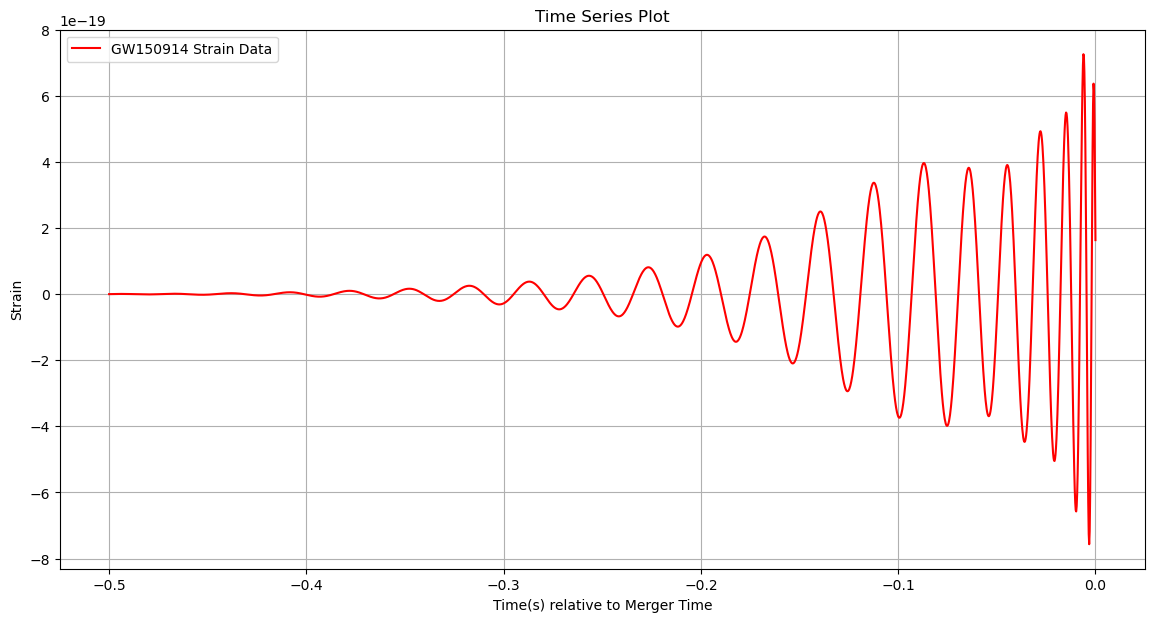

In [21]:
# Generate the Time Series plot
plt.figure(figsize=(14, 7))
plt.plot(X, Y, label='GW150914 Strain Data', color='red')
plt.xlabel('Time(s) relative to Merger Time')
plt.ylabel('Strain')
plt.title('Time Series Plot')
plt.legend()
plt.grid(True)
plt.show()

### 2. **Analysing the frequency**

In [90]:
#z is list of time of zero crossing of function from positive to negative
z = []
for i in range(1,len(X)-1):
#     if ([Y[i-1]>Y[i] and Y[i+1]<Y[i]]):
    if (Y[i]>0 and Y[i-1]<0):
        z = np.append(z,(X[i]+X[i-1])/2)

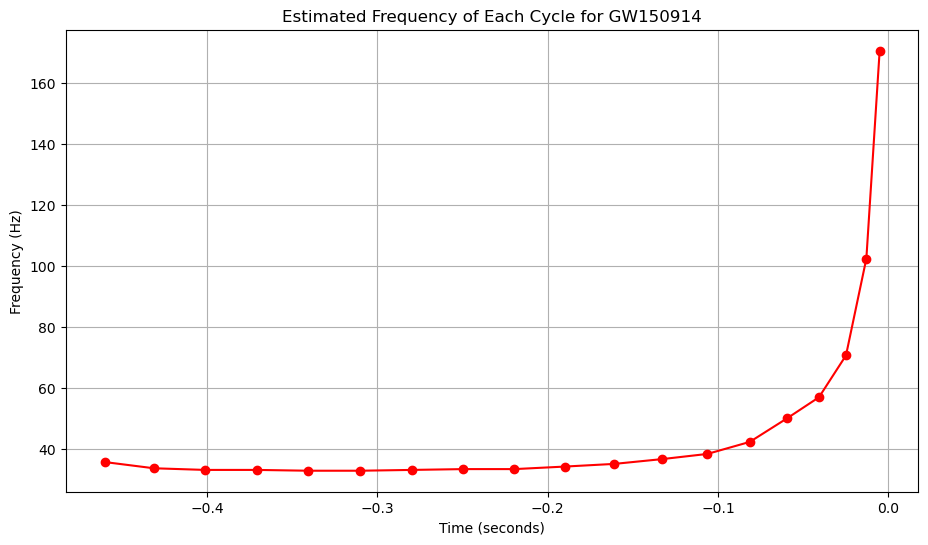

In [112]:
time_axis = []
frequency_axis = []
for i in range(0,len(z)-1):
    t = (z[i]+z[i+1])/2
    f = 1/(z[i+1]-z[i])
    time_axis = np.append(time_axis,t)
    frequency_axis = np.append(frequency_axis,f)

# Plotting the frequencies to observe the changes over time
plt.figure(figsize=(11, 6))
plt.plot(time_axis, frequency_axis, color='red', marker='o')
plt.title('Estimated Frequency of Each Cycle for GW150914')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.grid(True)
plt.show()

### 3. **Calculating the Chirp Mass**

*The Chirp Mass of the system can be given by the formula:*

$$
\mathcal{M} =  \frac{c^3}{G} \left( \frac{5}{96}\pi^{-\frac{8}{3}}f^{-\frac{11}{3}}\dot{f} \right)^{\frac{3}{5}}
$$

*The above equation can be integrated to obtain:*

$$
f_{GW}^{-8/3}(t) = \left(\frac{(8\pi)^{8/3}}{5}\right) \left(\frac{G\mathcal{M}}{c^3}\right)^{5/3} (t_c - t)
$$

We first ploted the $f^{-8/3}$ *vs Time* graph

Then we did curve fit on this graph and used it's slope to calculate the value of $\mathcal{M}$.

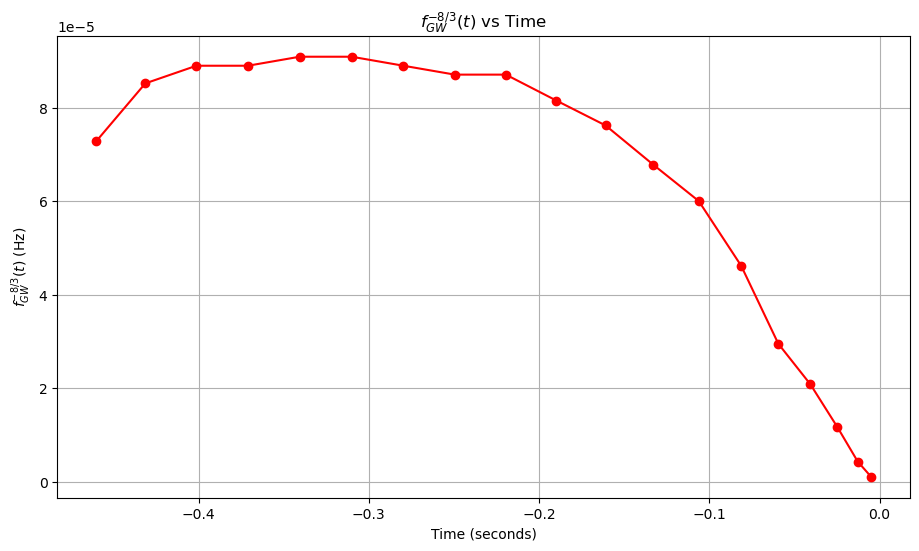

In [97]:
frequency_function =  np.power(frequency_axis,(-8)/3)   

plt.figure(figsize=(11, 6))
plt.plot(time_axis, frequency_function, color='red', marker='o')
plt.title('$f_{GW}^{-8/3}(t)$ vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('$f_{GW}^{-8/3}(t)$ (Hz)')
plt.grid(True)
plt.show()

In [65]:
# Curve Fitting using Linear Regression
regressor = LinearRegression()
X_train = time_axis[8:]
y_train = frequency_function[8:]
X_train = np.reshape(X_train,(len(X_train),1))
y_train = np.reshape(y_train,(len(y_train),1))
regressor.fit(X_train,y_train)


LinearRegression()

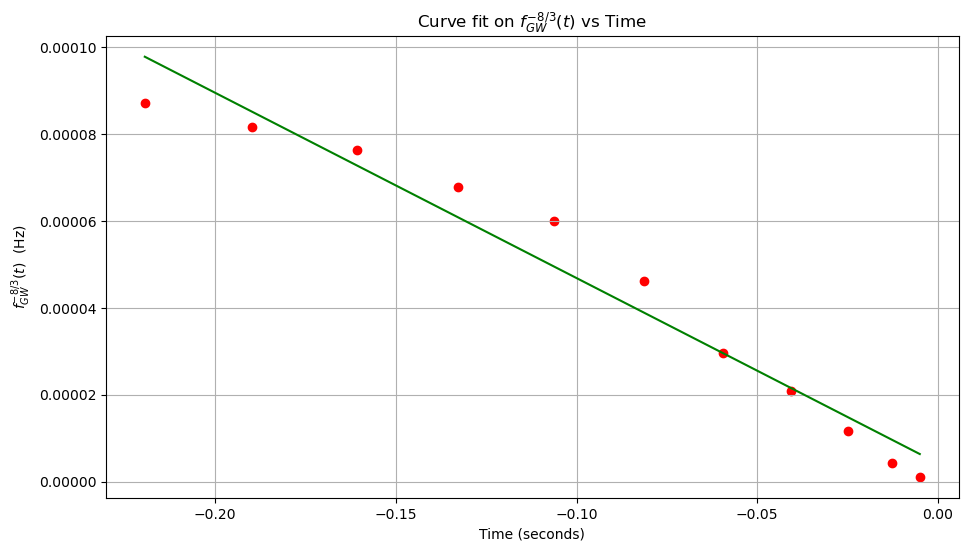

In [98]:
plt.figure(figsize=(11, 6))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), label='Least fit line', color = 'green')
plt.title('Curve fit on $f_{GW}^{-8/3}(t)$ vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('$f_{GW}^{-8/3}(t)$  (Hz)')
plt.grid(True)
plt.show()

In [122]:
# Calculating the chirp mass

slope = regressor.coef_[0][0]
k = (-1*5*slope/(pow(8*pi,8/3)))
m_chirp = pow(k,3/5)*(c**3)/(G*M_sun)
print('Chirp Mass = ',f"{m_chirp: .3f}",'M☉')

Chirp Mass =   29.134 M☉


### 4. **Estimating the Total Mass & Individual Masses of the system**
#
From the Time Series plot of the Strain, we can see that the Coalesce Time $(t_{c})$ turnes out to be 0(s).
#
Now we can calculate the total mass using the following formula:

$$
M_{\text{tot}} = M + m = \frac{c^3}{\pi \sqrt{8} G f_{max} }
$$

We also need the Maximum Frequency $(f_{max})$ of the Strain. This turns out to 256(Hz) using the GW150914 Spectogram provided in the PS.

![](spectrogram.png)

In [117]:
max_frequency = 256
m_total = c**3/(pi*(8**0.5)*G*max_frequency*M_sun)

print('Total Mass of the System = ' ,f"{m_total: .3f}",'M☉')

Total Mass of the System =   89.252 M☉


In [119]:
p = ((M**5)*(m_total))**(1/3) # product of masses
m_1 = (m_total + (m_total**2 - 4*p)**0.5)/2
m_2= m_total - m_1

print('Mass of the heavier object = ',f"{m_1: .3f}",'M☉')
print('Mass of the lighter object = ',f"{m_2: .3f}",'M☉')

Mass of the heavier object =   72.171 M☉
Mass of the lighter object =   17.081 M☉


We can verify our Coalesce Time $(t_{c})$, by plotting the Orbital Seperation vs Time graph
#
Orbital Seperation is given by:
$$
r(t) = \left( \frac{{256}}{{5}} \cdot \mu \cdot M^2 \right)^{\frac{1}{4}} \cdot (t_c - t)^{\frac{1}{4}}
$$
Here, 
M = total mass of system,
$\mu$ = reduced mass of system, $t_c$ = coalescence time

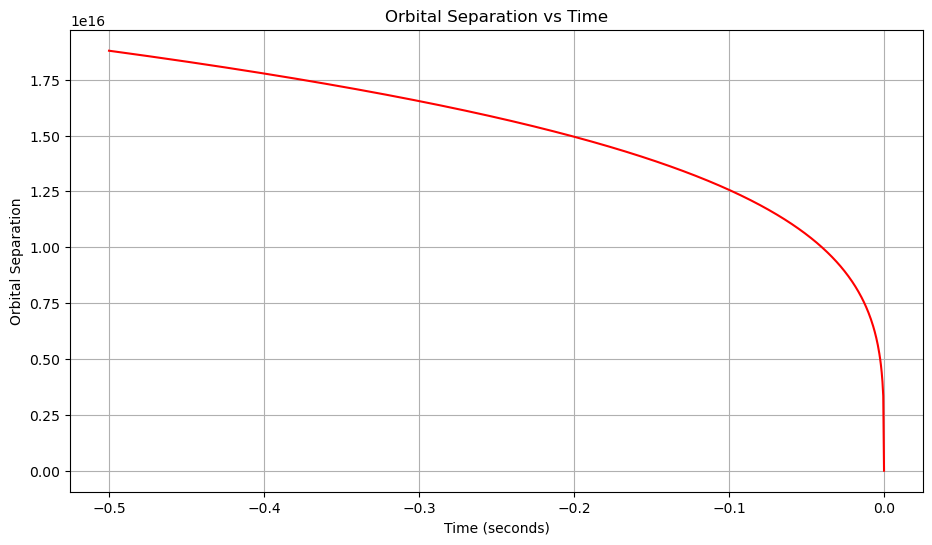

In [132]:
time_axis = np.linspace(-0.5,0,1000)
orbital_seperation = (((256/5)*(m_2*m_1)/(m_2+m_1)*((m_total*M_sun**2)))*(-1*time_axis))**.25

plt.figure(figsize=(11, 6))
plt.plot(time_axis, orbital_seperation, color = 'red')
plt.title('Orbital Separation vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Orbital Separation')
plt.grid(True)
plt.show()

#### **These are our results after analysing the GW data :**

- Chirp Mass $(\mathcal{M})$ = 29.134 M☉
- Total Mass $(M_{total})$ = 89.252 M☉
- Mass of the heavier object (m1) = 72.171 M☉
- Mass of the lighter object (m2) = 17.081 M☉
- Coalesce Time $(t_{c})$ = 0 s

# **Drawing the Waveform usnig PyCBC**

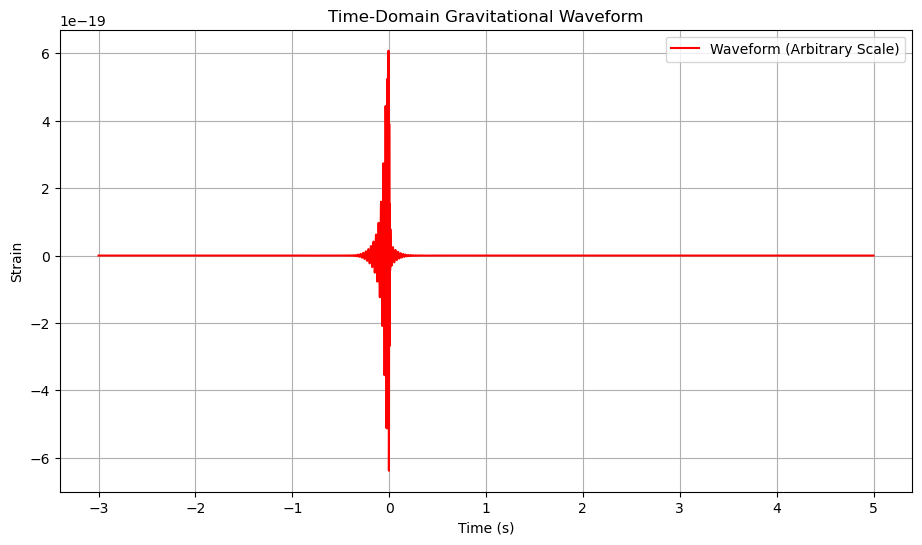

In [139]:
# Time of coalescence
t_c = 0.0

# Generate time-domain waveform
generated_strain, _ = get_td_waveform(approximant='IMRPhenomD', mass1=m_1, mass2=m_2, delta_t=1.0/4096, f_lower=40)

# Plot the waveform
plt.figure(figsize=(11, 6))
plt.plot(generated_strain.sample_times - t_c, generated_strain, label='Waveform (Arbitrary Scale)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Time-Domain Gravitational Waveform')
plt.legend()
plt.grid(True)
plt.show()


In [144]:
def plot_near_merger_time(m1, m2, t_c = 0.0):
    generated_strain, _ = get_td_waveform(approximant='IMRPhenomD', mass1=m1, mass2=m2, delta_t=1.0/4096, f_lower=40)
    
    # Define time range for zooming in (e.g., ±0.1 seconds around merger time)
    zoom_window = 0.01  # seconds
    zoom_range = (t_c - zoom_window, t_c + zoom_window)
    # Find indices corresponding to the zoom range
    zoom_indices = np.where((generated_strain.sample_times >= zoom_range[0]) & (generated_strain.sample_times <= zoom_range[1]))
    
    # Plot the zoomed-in waveform
    plt.figure(figsize=(11, 6))
    plt.plot(generated_strain.sample_times[zoom_indices] - t_c, generated_strain[zoom_indices], label='Waveform', color='red')
    plt.xlabel('Time (s) relative to merger')
    plt.ylabel('Strain')
    plt.title('Zoomed-In Time-Domain Gravitational Waveform')
    plt.legend()
    plt.grid(True)
    plt.show()

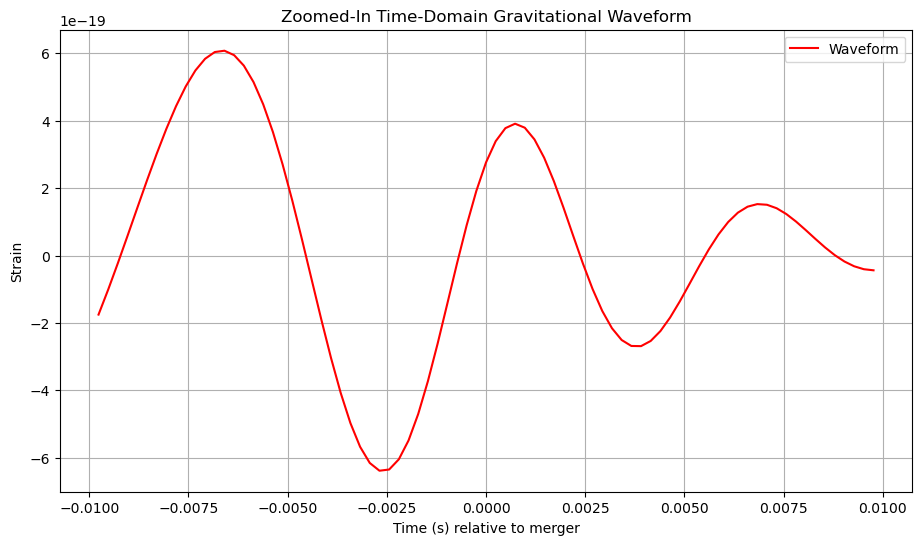

In [145]:
plot_near_merger_time(m_1, m_2)

# **Estimating the Distance**

### 1. **Derivation of Intensity Using Dimensional Analysis**

*The amplitude of a gravitational wave is denoted by h. Assuming that the
intensity of a gravitational wave is proportional to the square of the amplitude, we can derive the intensity by dimensional analysis.*

*The given equation is:*

$$
I_{\text{rad}} = \beta c^b G^c h^2 f_{max}^a 
$$

*Where:*
- *$I_{\text{rad}}$ is the intensity,*
- *$\beta$ is a dimensionless constant,*
- *$h$ is a length,*
- *$f_{max}$ is a maximum frequency,*
- *$c$ is the speed of light,*
- *$G$ is the gravitational constant,*
- *$a$, $b$, and $c$ are dimensionless exponents.*

*We'll use the dimensions of the quantities involved to determine the exponents $a$, $b$, and $c$.*

*The dimensions of the given quantities are:*
- *$[I_{\text{rad}}] = \text{Intensity} = \frac{ML^2}{T^3}$*
- *$[h] = Length = L$*
- *$[f] = Frequency = T^{-1}$*
- *$[c] = Speed = \frac{L}{T}$*
- *$[G] = Gravitational Constant = \frac{L^3}{MT^2}$*

*Now, substituting the dimensions into the equation:*

$$
[I_{\text{rad}}] = \beta \cdot L^{2} \cdot T^{-a} \cdot \left(\frac{L}{T}\right)^{b} \cdot \left(\frac{L^3}{MT^2}\right)^{c}
$$

*Equating the dimensions on both sides of the equation:*

$$
\frac{ML^2}{T^3} = \beta \cdot L^{2} \cdot T^{-a} \cdot L^{b} \cdot T^{-b} \cdot M^{-c} \cdot L^{3c} \cdot T^{-2c}
$$

*Now, equating the dimensions of mass, length, and time separately, we get the following equations:*

*For mass:*

$$
1 = -c
$$

*This gives us:*

$$
c = -1
$$

*For length:*

$$
2 = 2 + b + 3c
$$

*This gives us:*

$$
b = 3
$$

*For time:*

$$
-3 = -a -b - 2c
$$

*This gives us:*

$$
a = 2
$$

*Now we have the values of $a$, $b$, and $c$, which are $1$, $0$, and $0$ respectively.*

*Substituting these values back into the equation, we get:*

$$
I_{\text{rad}} = \beta \frac{c^-5}{G} h^2 f_{max}^2
$$
*Here we take β = π/2. So, the derived expression for the intensity using dimensional analysis is:*

$$
I_{\text{rad}} = \frac{\pi c^-5}{2 G} h^2 f_{max}^2
$$


### 2. **Derivation of Formula for $R$**

Given the following equations:

$$I_{\text{rad}} = \beta \frac{c^3}{G} h^2 f_{max}^2$$
$$ P_{\text{rad}} = \alpha \frac{G^{7/3} (\pi f_{max})^{10/3}}{c^5}  \frac{m1^2 m2^2}{(m1 + m2)^{2/3}}  $$

The intensity of gravitational radiation at a distance R  on average falls off as square of distance from source with distance as 
$I_{\text{rad}} = \frac{P_{\text{rad}}}{4\pi R^2}$


Solving for $R$:

$$
R = \sqrt{\frac{P_{rad}}{4\pi I_{{rad}}}}
$$


Finally, taking the square root of both sides:

$$
R = \sqrt{\frac{\alpha \left( \frac{G^{7/3} (\pi f_{\text{max}})^{10/3}}{c^5} \right) \left( \frac{m_1^2 m_2^2}{(m_1 + m_2)^{2/3}} \right)}{4 \pi \left( \beta^3 \frac{c^- h^2 f_{\text{max}}^2}{G} \right)}}
$$

This is the formula for $R$ derived using the given equations.


In [157]:
# Constants
alpha = 32/5
beta = np.pi/2
f_max = 256 
m1 = m_1
m2 =m_2
h = 1e-21

# Equation for I_rad
I_rad = beta**3 * c**-5 * h**2 * f_max**2 / G

# Equation for P_rad
P_rad = alpha * (G**(7/3) * (np.pi * f_max)**(10/3)) / (c**5 * ((m1 * m2)**2) / (m1 + m2)**(2/3))

# Equation for R
R = np.sqrt(P_rad / (4 * np.pi * I_rad))
R


3921.0120646259743